In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


tqdm.pandas()

In [2]:
train = pd.read_csv("../../dataset/processed/cleanDataset.csv", index_col=0)
test = pd.read_csv("../../dataset/processed/cleanTest.csv", index_col=0)

train.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,2,1.0,17.0688,22.0,Flat,bamboo or timber,bamboo/timber light roof,clay,timber/bamboo-mud,Not attached,...,No reinforcement concrete,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,Unknown/not stated,Unknown/not stated,1.0
1,3,3.0,300.2280,18.0,Flat,clay sand mixed mortar-stone/brick,wood light roof or bamboo heavy roof,clay,timber/bamboo-mud,Not attached,...,No reinforcement concrete,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,"Mud + Mortar,Clay",Stone Bricks,5.0
3,2,18.0,56.3880,15.0,Flat,clay sand mixed mortar-stone/brick,wood light roof or bamboo light roof,clay,timber/bamboo-mud,Not attached,...,No reinforcement concrete,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,"Mud + Mortar,Clay",Stone Bricks,4.0
4,2,22.0,27.4320,17.0,Flat,clay sand mixed mortar-stone/brick,bamboo or timber light roof,clay,timber/bamboo-mud,Not attached,...,No reinforcement concrete,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,"Mud + Mortar,Clay",Stone Bricks,1.0
7,2,40.0,153.6192,14.0,Flat,clay mortar-stone/brick,bamboo/timber light roof,clay,timber/bamboo-mud,Not attached,...,No reinforcement concrete,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,"Mud + Mortar,Clay",Stone Bricks,4.0


In [3]:
dict_type_of_roof = {
    "bamboo/timber-heavy roof": "bamboo/timber heavy roof",
    "bamboo or timber light roof": "bamboo/timber-light roof",
    "bamboo/timber light roof ": "bamboo/timber-light roof",
    "bamboo or timber heavy roof": "bamboo/timber heavy roof",
    "bamboo/timber light roof": "bamboo/timber-light roof",
    "reinforced brick concrete/rcc/rbc": "reinforced cement concrete/rb/rbc"
}

train["type_of_roof"].replace(dict_type_of_roof, inplace=True)
test["type_of_roof"].replace(dict_type_of_roof, inplace=True)

In [4]:
train["type_of_roof"].value_counts()

bamboo/timber-light roof                139695
wood light roof or bamboo heavy roof     70095
wood light roof or bamboo light roof     59880
reinforced cement concrete/rb/rbc        15116
bamboo/timber heavy roof                 14353
reinforced brick slab/rcc/rbc             2468
Name: type_of_roof, dtype: int64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301607 entries, 0 to 520010
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   floors_before_eq (total)        301607 non-null  int64  
 1   old_building                    301607 non-null  float64
 2   plinth_area (ft^2)              301607 non-null  float64
 3   height_before_eq (ft)           301607 non-null  float64
 4   land_surface_condition          301607 non-null  int64  
 5   type_of_foundation              301607 non-null  object 
 6   type_of_roof                    301607 non-null  object 
 7   type_of_ground_floor            301607 non-null  object 
 8   type_of_other_floor             301607 non-null  object 
 9   position                        301607 non-null  object 
 10  building_plan_configuration     301607 non-null  object 
 11  technical_solution_proposed     301607 non-null  int64  
 12  legal_ownership_

In [13]:
train["technical_solution_proposed"].value_counts()

3    182496
2     53633
1     35843
0     29635
Name: technical_solution_proposed, dtype: int64

In [15]:
change_list = {'Flat': 0, 'Moderate slope': 1, 'Steep slope': 2}

train["land_surface_condition"] = train["land_surface_condition"].map(change_list)
test["land_surface_condition"] = test["land_surface_condition"].map(change_list)

In [16]:
change_list = {
    "No need": 0,
    "Minor repair": 1,
    "Major repair": 2,
    "Reconstruction": 3
}

train["technical_solution_proposed"] = train["technical_solution_proposed"].map(change_list)
test["technical_solution_proposed"] = test["technical_solution_proposed"].map(change_list)

In [18]:
type_of_foundation_dict = {
    "mud mortar-stone/brick": "clay mortar-stone/brick",
    "bamboo/timber": "bamboo or timber",
    "bamboo/timber": "bamboo or timber",
    "rc": "reinforced concrete",
    "others": "other",
    "cement-stone or cement-brick": "cement-stone/brick"
}

train["type_of_foundation"] = train["type_of_foundation"].replace(
    type_of_foundation_dict).str.lower().str.strip()
test["type_of_foundation"] = test["type_of_foundation"].replace(
    type_of_foundation_dict).str.lower().str.strip()


In [19]:
type_of_ground_floor_dict = {
    "rc": "reinforced concrete",
    "brick/stone": "brick or stone",
}

train["type_of_ground_floor"] = train["type_of_ground_floor"].str.lower(
).replace(type_of_ground_floor_dict)
test["type_of_ground_floor"] = test["type_of_ground_floor"].str.lower(
).replace(type_of_ground_floor_dict)

In [23]:
train["residential_type"] = train["residential_type"].replace({
    "Other Residential Type": "Other"
})

test["residential_type"] = test["residential_type"].replace({
    "Other Residential Type": "Other"
})

In [24]:
train["no_family_residing"] = train["no_family_residing"].replace({
    "None": 0
})

test["no_family_residing"] = test["no_family_residing"].replace({
    "None": 0
})

In [26]:
# train["public_place_type"] = train["public_place_type"].apply(lambda x: "Public" if x != "Non-public" else "Non-public")
# test["public_place_type"] = test["public_place_type"].apply(lambda x: "Public" if x != "Non-public" else "Non-public")

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301607 entries, 0 to 520010
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   floors_before_eq (total)        301607 non-null  int64  
 1   old_building                    301607 non-null  float64
 2   plinth_area (ft^2)              301607 non-null  float64
 3   height_before_eq (ft)           301607 non-null  float64
 4   land_surface_condition          0 non-null       float64
 5   type_of_foundation              301607 non-null  object 
 6   type_of_roof                    301607 non-null  object 
 7   type_of_ground_floor            301607 non-null  object 
 8   type_of_other_floor             301607 non-null  object 
 9   position                        301607 non-null  object 
 10  building_plan_configuration     301607 non-null  object 
 11  technical_solution_proposed     0 non-null       float64
 12  legal_ownership_

## FE

In [51]:
from sklearn.model_selection import train_test_split

objectCol = list(train.select_dtypes(include=['object']).columns)
numCol = list(train.select_dtypes(exclude=['object']).columns)[:-1]

X = train.iloc[:, :-1]
y = train.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder
numeric_features = numCol
categorical_features = objectCol
numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(TargetEncoder())
Preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_transformer', numeric_transformer, numeric_features),
        ('categorical_transformer', categorical_transformer, categorical_features)
    ])

In [56]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)
X_train = Preprocessor.fit_transform(X_rus, y_rus)
X_test = Preprocessor.transform(X_test)

In [57]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

params = {'lambda_l1': 0.09918938374098207,
          'lambda_l2': 0.12147618595222721,
          'num_leaves': 81,
          'feature_fraction': 0.5375403412968238,
          'bagging_fraction': 0.9903473914047031,
          'bagging_freq': 4,
          'min_child_samples': 78}

l = LGBMClassifier(**params, random_state=69420)
l.fit(X_train, y_rus)

y_pred = l.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'))


[LightGBM] [Warning] feature_fraction is set=0.5375403412968238, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5375403412968238
[LightGBM] [Warning] lambda_l1 is set=0.09918938374098207, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09918938374098207
[LightGBM] [Warning] bagging_fraction is set=0.9903473914047031, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9903473914047031
[LightGBM] [Warning] lambda_l2 is set=0.12147618595222721, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12147618595222721
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
0.3854295425517108


In [40]:
from collections import Counter

In [41]:
hasil = l.predict(Preprocessor.transform(test))

Counter(hasil).most_common()

[(4.0, 96137), (3.0, 61868), (0.0, 36342), (2.0, 26239), (1.0, 21496)]

In [90]:
l_selected_features = pd.DataFrame(
    l.feature_importances_, index=np.arange(0, 111), columns=['importance'])
l_selected_features.sort_values(by='importance', ascending=False, inplace=True)

sweet_spot_l = {}
for i in range(1, 112):
    X_train_selected = X_train.toarray()[:, l_selected_features[:i].index]
    X_test_selected = X_test.toarray()[:, l_selected_features[:i].index]

    l_s = LGBMClassifier(**params, random_state=69420, verbose=-1)
    l_s.fit(X_train_selected, y_rus)

    y_pred = l_s.predict(X_test_selected)
    skor = f1_score(y_test, y_pred, average='macro')
    print(f"{i} fitur teratas : {skor}")
    sweet_spot_l[i] = skor

1 fitur teratas : 0.240841007449345
[LightGBM] [Warning] feature_fraction is set=0.5375403412968238, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5375403412968238
[LightGBM] [Warning] lambda_l1 is set=0.09918938374098207, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09918938374098207
[LightGBM] [Warning] bagging_fraction is set=0.9903473914047031, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9903473914047031
[LightGBM] [Warning] lambda_l2 is set=0.12147618595222721, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12147618595222721
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
2 fitur teratas : 0.27468132300856496
[LightGBM] [Warning] feature_fraction is set=0.5375403412968238, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5375403412968238
[LightGBM] [Warning] lambda_l1 is set=0.09918938374098207, reg_alpha=0.0 will be ignored. Cu

<Axes: ylabel='f1_score'>

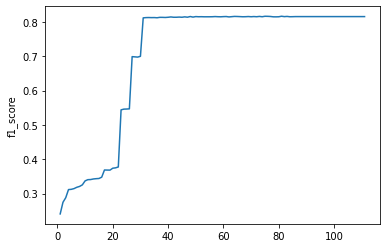

In [91]:
sweet_spot_l = pd.DataFrame.from_dict(
    sweet_spot_l, orient='index', columns=['f1_score'])
sweet_spot_l.sort_values(by='f1_score', ascending=False, inplace=True)

sns.lineplot(x=sweet_spot_l.index, y=sweet_spot_l.f1_score)

In [93]:
sweet_spot_l.head(10)


,f1_score
81,0.816644
75,0.816553
76,0.816371
73,0.816128
83,0.816127
64,0.816123
77,0.815945
65,0.815898
48,0.815818
61,0.815803


In [102]:
l = LGBMClassifier(**params, random_state=69420)
l.fit(X_train.toarray()[:, l_selected_features[:81].index], y_rus)

y_pred = l.predict(X_test.toarray()[:, l_selected_features[:81].index])

print(f1_score(y_test, y_pred, average='macro'))

[LightGBM] [Warning] feature_fraction is set=0.5375403412968238, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5375403412968238
[LightGBM] [Warning] lambda_l1 is set=0.09918938374098207, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09918938374098207
[LightGBM] [Warning] bagging_fraction is set=0.9903473914047031, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9903473914047031
[LightGBM] [Warning] lambda_l2 is set=0.12147618595222721, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12147618595222721
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
0.816643911642682


In [100]:
from collections import Counter

In [105]:
submit_df = Preprocessor.transform(test)
submit_df = submit_df.toarray()[:, l_selected_features[:81].index]
y_pred_sub = l.predict(submit_df)

Counter(y_pred_sub).most_common()

[(4.0, 80566), (3.0, 68778), (2.0, 41213), (1.0, 35121), (0.0, 16404)]

In [106]:
submission = pd.read_csv("../../dataset/raw/sample_submission.csv")
submission["damage_grade"] = y_pred_sub + 1
submission["damage_grade"] = submission["damage_grade"].astype(int)
submission.head()

,id,damage_grade
0,0,4
1,1,5
2,2,5
3,3,4
4,4,2


In [107]:
submission.to_csv("../../dataset/submission_lgbm_feat_select_tuned_ALLAHUAKBAR.csv", index=False)